Shape of the image matrix: (360, 540, 3)


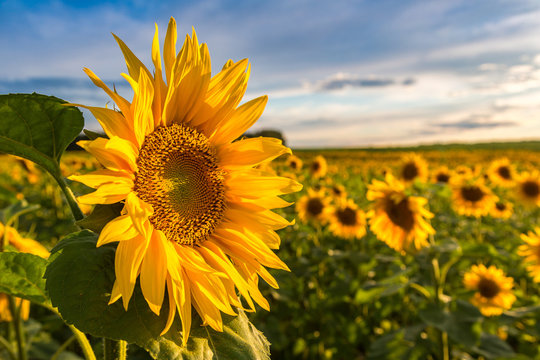

In [2]:
from PIL import Image  
import numpy as np     
import matplotlib.pyplot as plt
image = Image.open('rgb.png')

image_matrix = np.array(image)

print("Shape of the image matrix:", image_matrix.shape)
image

In [41]:
height, width, channels = image_matrix.shape

print("Image Dimensions:")
print(f"Height: {height} pixels")
print(f"Width: {width} pixels")
print(f"Number of Color Channels: {channels}")

Image Dimensions:
Height: 360 pixels
Width: 540 pixels
Number of Color Channels: 3


In [42]:
red_channel = image_matrix[:, :, 0]  
green_channel = image_matrix[:, :, 1] 
blue_channel = image_matrix[:, :, 2]  

print("Shape of Red Channel:", red_channel.shape)
print("Shape of Green Channel:", green_channel.shape)
print("Shape of Blue Channel:", blue_channel.shape)

Shape of Red Channel: (360, 540)
Shape of Green Channel: (360, 540)
Shape of Blue Channel: (360, 540)


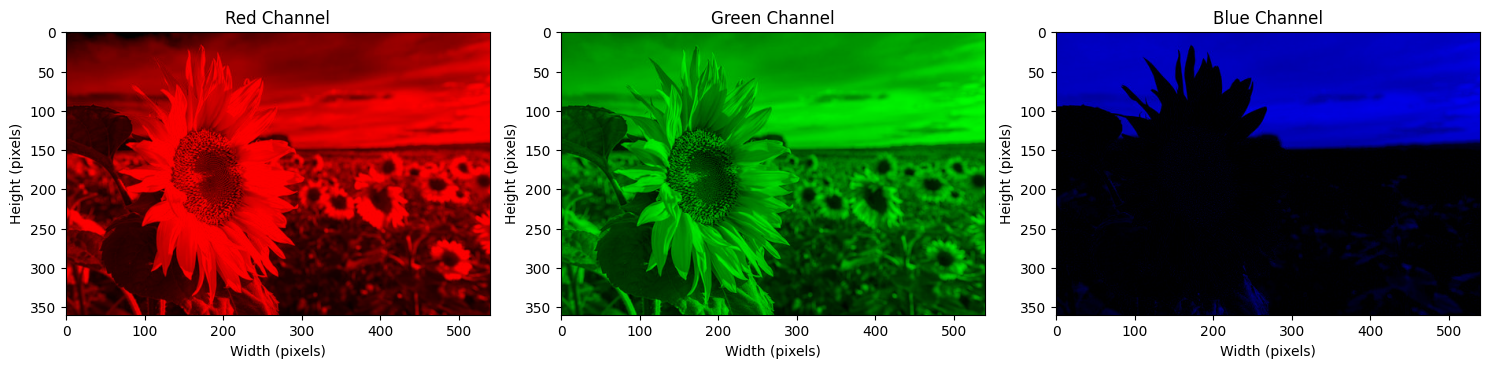

In [43]:
red_channel = image_matrix[:, :, 0]
green_channel = image_matrix[:, :, 1]
blue_channel = image_matrix[:, :, 2]

zeros = np.zeros_like(red_channel) 

red_image = np.stack([red_channel, zeros, zeros], axis=-1)  # Red channel only
green_image = np.stack([zeros, green_channel, zeros], axis=-1)  # Green channel only
blue_image = np.stack([zeros, zeros, blue_channel], axis=-1)  # Blue channel only

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(red_image)
plt.title("Red Channel")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")


plt.subplot(1, 3, 2)
plt.imshow(green_image)
plt.title("Green Channel")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")


plt.subplot(1, 3, 3)
plt.imshow(blue_image)
plt.title("Blue Channel")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")


plt.tight_layout()
plt.show()

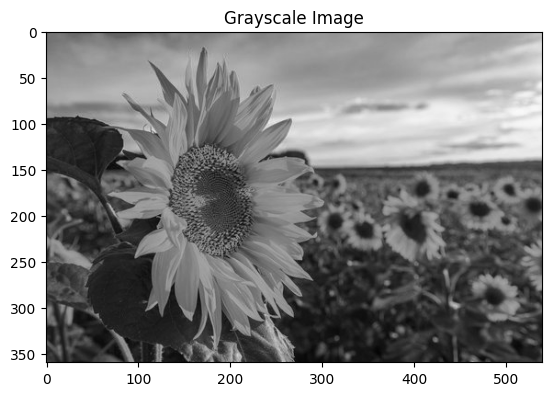

In [6]:
grayscale_matrix = np.array([
    [1/3, 1/3, 1/3],
    [1/3, 1/3, 1/3],
    [1/3, 1/3, 1/3]
])

height, width, channels = image_matrix.shape
image_reshaped = image_matrix.reshape(-1, 3)

grayscale_values = np.dot(image_reshaped, grayscale_matrix.T)

grayscale_image = grayscale_values.reshape(height, width, channels)

grayscale_image = grayscale_image.astype(np.uint8)

plt.imshow(grayscale_image, cmap='gray')
plt.title("Grayscale Image")
plt.show()

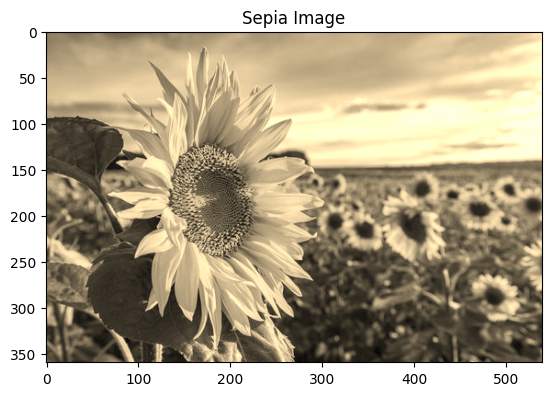

In [45]:
sepia_matrix = np.array([
    [0.393, 0.769, 0.189],
    [0.349, 0.686, 0.168],
    [0.272, 0.534, 0.131]
])

height, width, channels = image_matrix.shape
image_reshaped = image_matrix.reshape(-1, 3)

sepia_values = np.dot(image_reshaped, sepia_matrix.T)

sepia_values = np.clip(sepia_values, 0, 255)

sepia_image = sepia_values.reshape(height, width, channels)

sepia_image = sepia_image.astype(np.uint8)

plt.imshow(sepia_image)
plt.title("Sepia Image")
plt.show()

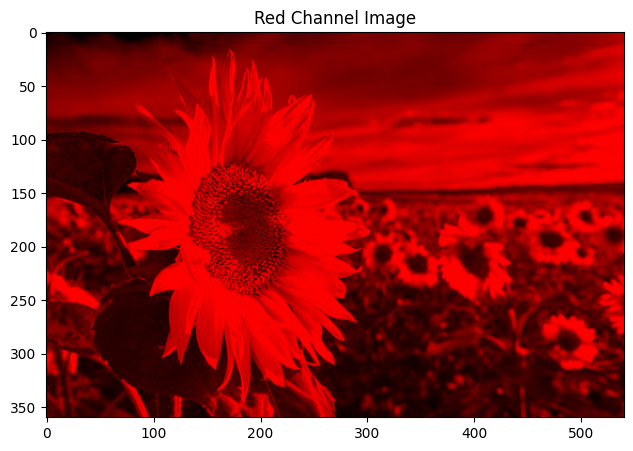

In [27]:
height, width, channels = image_matrix.shape
image_reshaped = image_matrix.reshape(-1, 3)

red_matrix = np.array([
    [1, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
])
red_values = np.dot(image_reshaped, red_matrix.T)
red_image = red_values.reshape(height, width, channels).astype(np.uint8)

plt.figure(figsize=(15, 5))

plt.imshow(red_image)
plt.title("Red Channel Image")
plt.show()

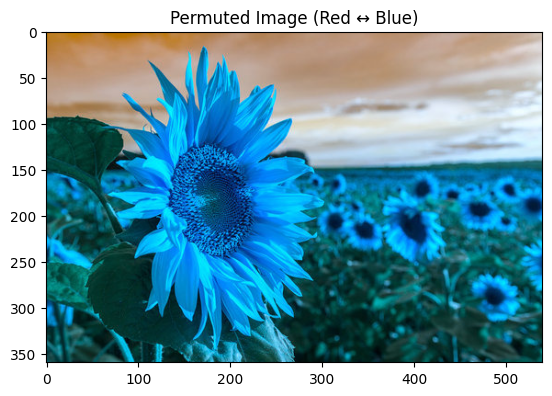

In [28]:
permute_matrix = np.array([
    [0, 0, 1],
    [0, 1, 0],
    [1, 0, 0]
])
permute_values = np.dot(image_reshaped, permute_matrix.T)
permute_image = permute_values.reshape(height, width, channels).astype(np.uint8)

plt.imshow(permute_image)
plt.title("Permuted Image (Red ↔ Blue)")
plt.show()

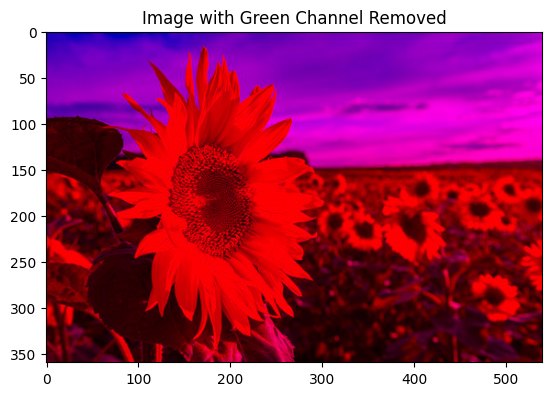

In [29]:
delete_green_matrix = np.array([
    [1, 0, 0],
    [0, 0, 0],
    [0, 0, 1]
])
delete_green_values = np.dot(image_reshaped, delete_green_matrix.T)
delete_green_image = delete_green_values.reshape(height, width, channels).astype(np.uint8)

plt.imshow(delete_green_image)
plt.title("Image with Green Channel Removed")
plt.show()

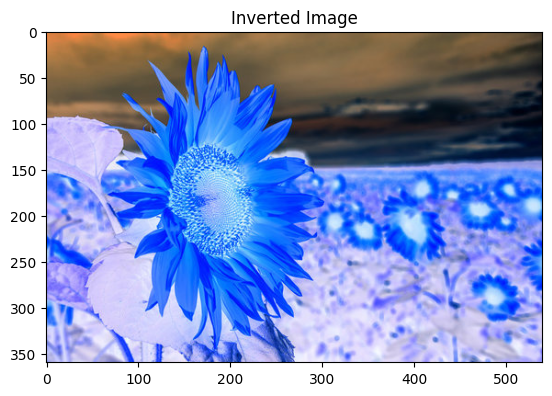

In [47]:
inverted_image = 255 - image_matrix

inverted_image = inverted_image.astype(np.uint8)

plt.imshow(inverted_image)
plt.title("Inverted Image")
plt.show()

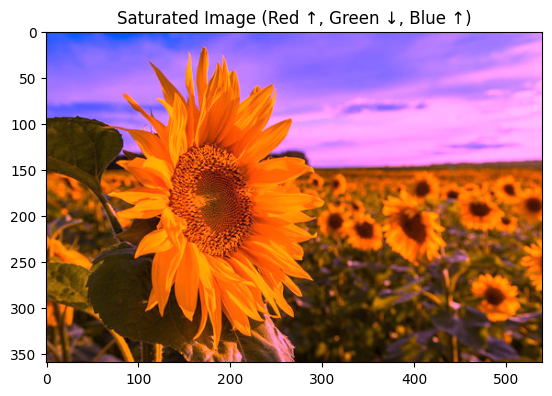

In [48]:
saturate_matrix = np.array([
    [1.2, 0, 0],
    [0, 0.75, 0],
    [0, 0, 2]
])

height, width, channels = image_matrix.shape
image_reshaped = image_matrix.reshape(-1, 3)

saturated_values = np.dot(image_reshaped, saturate_matrix.T)

saturated_values = np.clip(saturated_values, 0, 255)

saturated_image = saturated_values.reshape(height, width, channels)

saturated_image = saturated_image.astype(np.uint8)

plt.imshow(saturated_image)
plt.title("Saturated Image (Red ↑, Green ↓, Blue ↑)")
plt.show()

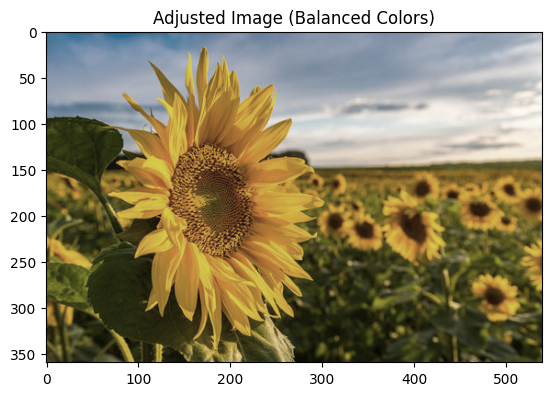

In [49]:
user_matrix = np.array([
    [0.7, 0.15, 0.15],
    [0.15, 0.7, 0.15],
    [0.15, 0.15, 0.7]
])

height, width, channels = image_matrix.shape
image_reshaped = image_matrix.reshape(-1, 3)

adjusted_values = np.dot(image_reshaped, user_matrix.T)

adjusted_values = np.clip(adjusted_values, 0, 255)


adjusted_image = adjusted_values.reshape(height, width, channels)

adjusted_image = adjusted_image.astype(np.uint8)

plt.imshow(adjusted_image)
plt.title("Adjusted Image (Balanced Colors)")
plt.show()

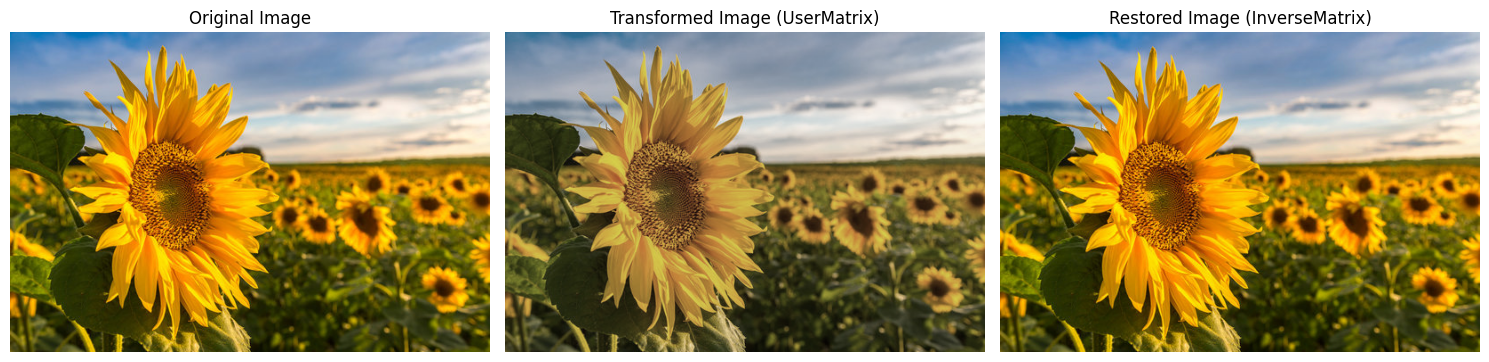

In [53]:


inverse_matrix = np.linalg.inv(user_matrix)

height, width, channels = image_matrix.shape
image_reshaped = image_matrix.reshape(-1, 3)

transformed_values = np.dot(image_reshaped, user_matrix.T)
transformed_values = np.clip(transformed_values, 0, 255)
transformed_image = transformed_values.reshape(height, width, channels).astype(np.uint8)

transformed_reshaped = transformed_image.reshape(-1, 3)
restored_values = np.dot(transformed_reshaped, inverse_matrix.T)
restored_values = np.clip(restored_values, 0, 255)
restored_image = restored_values.reshape(height, width, channels).astype(np.uint8)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_matrix)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(transformed_image)
plt.title("Transformed Image (UserMatrix)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(restored_image)
plt.title("Restored Image (InverseMatrix)")
plt.axis('off')

plt.tight_layout()
plt.show()

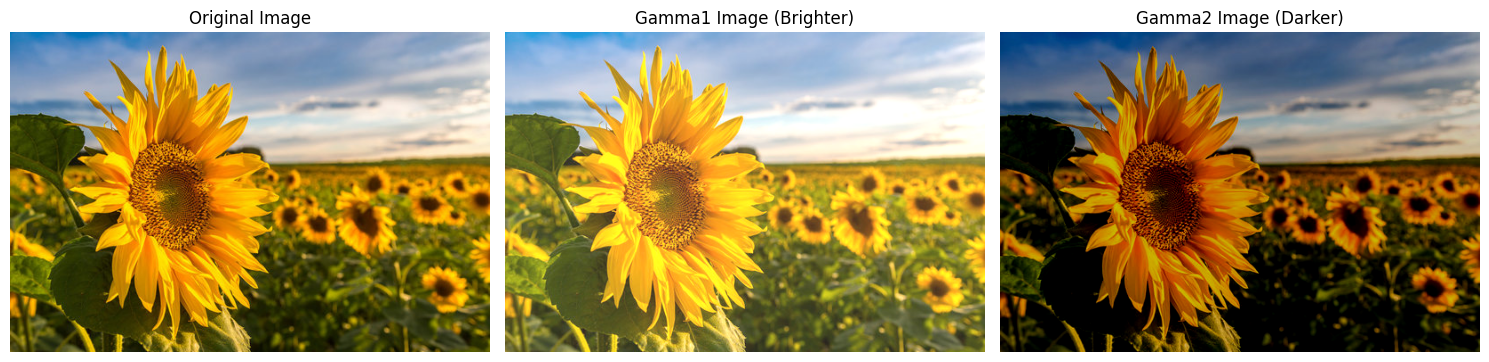

In [54]:
image_normalized = image_matrix / 255.0

def gamma1(image):
    return np.power(image, 0.9) + 30 / 255.0

def gamma2(image):
    return np.power(image, 1.1) - 50 / 255.0 

gamma1_image = gamma1(image_normalized)
gamma1_image = np.clip(gamma1_image, 0, 1)
gamma1_image = (gamma1_image * 255).astype(np.uint8)

gamma2_image = gamma2(image_normalized)
gamma2_image = np.clip(gamma2_image, 0, 1)
gamma2_image = (gamma2_image * 255).astype(np.uint8)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_matrix)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gamma1_image)
plt.title("Gamma1 Image (Brighter)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gamma2_image)
plt.title("Gamma2 Image (Darker)")
plt.axis('off')

plt.tight_layout()
plt.show()